In [51]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [59]:
df = pd.read_csv("./datasets/dataset2.csv")
df.describe()
columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21',
       'char_freq_%24', 'char_freq_%23', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']
X=df[columns]
y=df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

<Axes: >

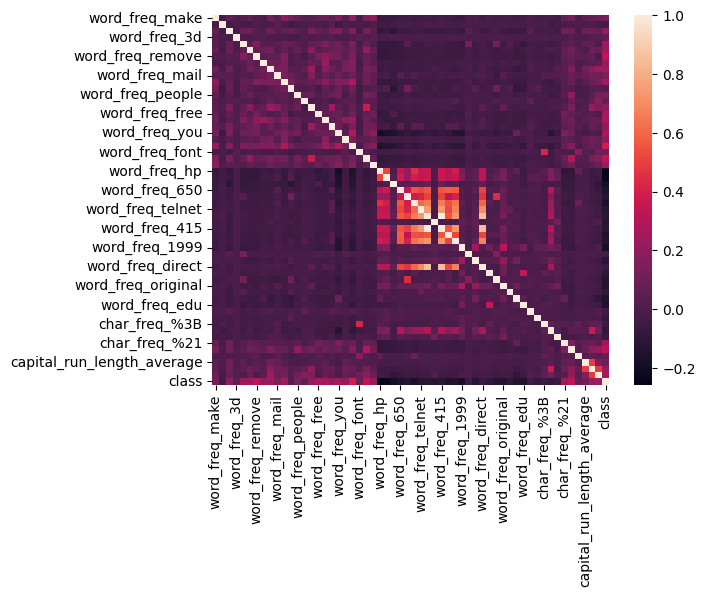

In [60]:
#EDA

import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
# print(df.corr())
sns.heatmap(df.corr())



In [53]:
#preprocessing
processed=X.copy()

##removing outliers
# print(processed.columns)

print(processed.shape)

# for i in columns:
#     print(i)
#     Q1=processed[i].quantile(0.25)
#     Q3=processed[i].quantile(0.75)
#     IQR=(Q3-Q1)
#     lower=Q1-1.5*IQR
#     upper=Q3+1.5*IQR
#     print(lower,upper)
#     processed=processed[(processed[i] >= lower) & (processed[i] <= upper)]
#     print(processed.shape)

for i in columns:
    # print(i)
    mean = df[i].mean()
    std = df[i].std()
    lower = mean-3*std
    upper = mean+3*std
    # print(lower,upper)
    processed[(processed[i] < lower) & (processed[i] > upper)] = processed[i].mean

print(processed.shape)



(4601, 58)
(4601, 58)


<Axes: >

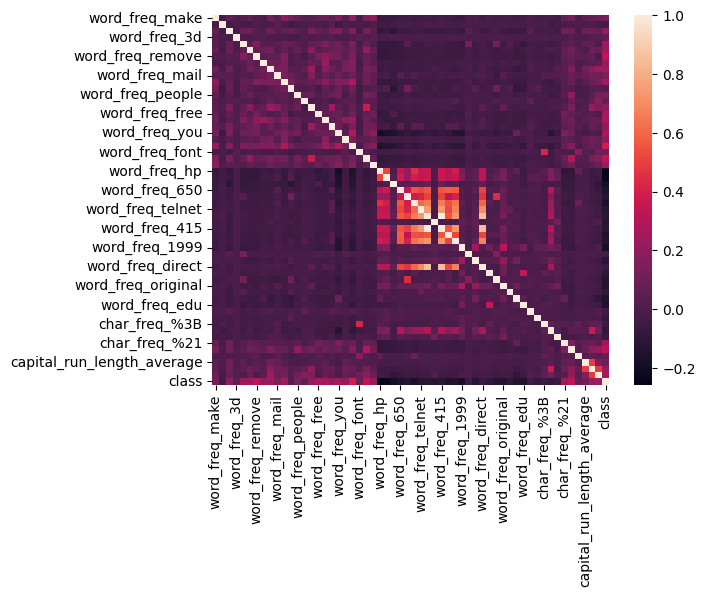

In [62]:
## EDA

sns.heatmap(processed.corr())

58
word_freq_make
word_freq_address
word_freq_all
word_freq_3d
word_freq_our
word_freq_over
word_freq_remove
word_freq_internet
word_freq_order
word_freq_mail
word_freq_receive
word_freq_will
word_freq_people
word_freq_report
word_freq_addresses
word_freq_free
word_freq_business
word_freq_email
word_freq_you
word_freq_credit
word_freq_your
word_freq_font
word_freq_000
word_freq_money
word_freq_hp
word_freq_hpl
word_freq_george
word_freq_650
word_freq_lab
word_freq_labs
word_freq_telnet
word_freq_857
word_freq_data
word_freq_415
word_freq_85
word_freq_technology
word_freq_1999
word_freq_parts
word_freq_pm
word_freq_direct
word_freq_cs
word_freq_meeting
word_freq_original
word_freq_project
word_freq_re
word_freq_edu
word_freq_table
word_freq_conference
char_freq_%3B
char_freq_%28
char_freq_%5B
char_freq_%21
char_freq_%24
char_freq_%23
capital_run_length_average
capital_run_length_longest
capital_run_length_total
class


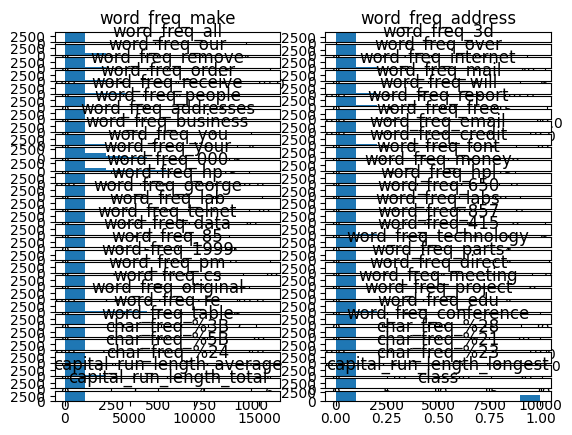

In [71]:
fig,ax = plt.subplots(nrows=29,ncols=2)
c=0
print(len(processed.columns))
for i in processed.columns:
    print(i)
    ax[c//2][c%2].hist(processed[i])
    ax[c//2][c%2].set_title(i)
    c+=1

# plt.tight_layout()
plt.show()
    